In [3]:
import pandas as pd

In [4]:
url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

titanic = pd.read_csv(url)

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df = titanic.drop(columns=["PassengerId", "Name", "Ticket", "Cabin", "Embarked"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [7]:
# handeling the missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [8]:
# missing values in Age column.
df.Age.isna().sum()

177

In [9]:
import matplotlib.pyplot as plt

<AxesSubplot:>

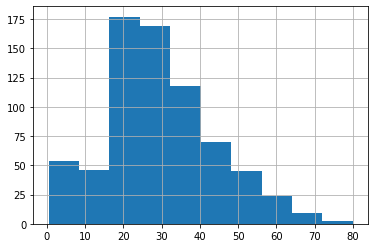

In [10]:
df.Age.hist()

In [11]:
df["Age_n"] = df.Age

In [12]:
median_age = df["Age"].median()
df["Age_n"] =  df.Age_n.fillna(median_age)

In [13]:
df.Age_n.isna().sum()

0

<AxesSubplot:>

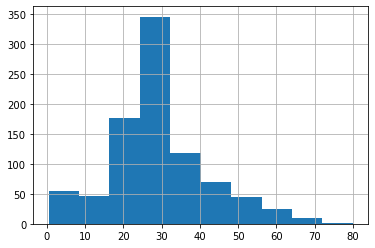

In [14]:
df.Age_n.hist()

In [15]:
# Now dropping the original Age column
df = df.drop(columns=["Age"])

In [16]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Age_n       0
dtype: int64

In [17]:
# Now that we dont have any Null values let's Handel teh categorical Values.
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age_n
0,0,3,male,1,0,7.2500,22.0
1,1,1,female,1,0,71.2833,38.0
2,1,3,female,0,0,7.9250,26.0
3,1,1,female,1,0,53.1000,35.0
4,0,3,male,0,0,8.0500,35.0


In [18]:
# Sex is a Binary categorical Feature so We'll use dummies
sex_dummies = pd.get_dummies(df.Sex)
sex_dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [19]:
df = pd.concat([df,sex_dummies],axis="columns")
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age_n,female,male
0,0,3,male,1,0,7.2500,22.0,0,1
1,1,1,female,1,0,71.2833,38.0,1,0
2,1,3,female,0,0,7.9250,26.0,1,0
3,1,1,female,1,0,53.1000,35.0,1,0
4,0,3,male,0,0,8.0500,35.0,0,1


In [20]:
df = df.drop(columns=["Sex"])
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Age_n,female,male
0,0,3,1,0,7.2500,22.0,0,1
1,1,1,1,0,71.2833,38.0,1,0
2,1,3,0,0,7.9250,26.0,1,0
3,1,1,1,0,53.1000,35.0,1,0
4,0,3,0,0,8.0500,35.0,0,1


In [21]:
# Now our data is ready for Classification
# Lets split the Features and Labels
x = df.drop(columns=["Survived"])
y = df.Survived

In [22]:
# Lets split the Training and testing data.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state= 355)

In [23]:
x_train.head()

,Pclass,SibSp,Parch,Fare,Age_n,female,male
39,3,1,0,11.2417,14.0,1,0
392,3,2,0,7.9250,28.0,0,1
679,1,0,1,512.3292,36.0,0,1
184,3,0,2,22.0250,4.0,1,0
84,2,0,0,10.5000,17.0,1,0


In [24]:
# creating the model
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
clf.score(x_train,y_train)

0.9839486356340289

In [25]:
# checking the accuracy for our decision tree.
clf.score(x_test, y_test)

0.753731343283582

In [26]:
# predicting
prediction = clf.predict(x_test)

In [27]:
# let's save the model
import pickle
with open('D:\Akash\Recover\MY NOTES\Machine Learning\iNneuron\Decision tree'+ '/assignment_modelForPrediction.sav', 'wb') as f:
    pickle.dump(clf,f)